In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/amazon_cells_labelled.txt"
            )
amazon = pd.read_csv(data_path, delimiter= '\t', header=None)
amazon.columns = ['message', 'rating']
keywords = ['a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon[str(key)] = amazon.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
amazon.head()

,message,rating,a,than,he,again,like,but,there,they,look,she
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False


In [3]:
amazon['allcaps'] = amazon.message.str.isupper()
amazon['Positive'] = (amazon['rating'] == 1)
amazon.head()

,message,rating,a,than,he,again,like,but,there,they,look,she,allcaps,Positive
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,True


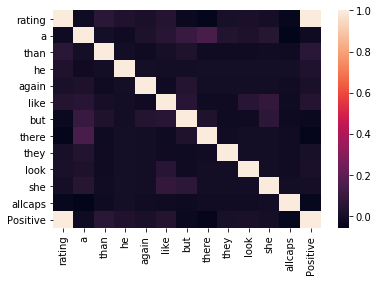

In [4]:
sns.heatmap(amazon.corr())

In [5]:
data = amazon[keywords + ['allcaps']]
target = amazon['Positive']

In [6]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print((data.shape[0] - (target == y_pred).sum())/data.shape[0])

Number of mislabeled points out of a total 1000 points : 484
0.484


In [7]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print((data.shape[0] - (target == y_pred).sum())/data.shape[0])

Number of mislabeled points out of a total 1000 points : 473
0.473


In [8]:
bnb = MultinomialNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print((data.shape[0] - (target == y_pred).sum())/data.shape[0])

Number of mislabeled points out of a total 1000 points : 479
0.479


## Classify Version 1
## We are lowercase the first letter of the message to reduce our missing Upper case word rate.
## This suppose to help us remove the Keywords that start with caps in the beginning of the review. 

In [9]:
data_path2 = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/amazon_cells_labelled.txt"
            )
amazon2 = pd.read_csv(data_path2, delimiter= '\t', header=None)
amazon2.columns = ['message', 'rating']
keywords = ['a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she']
print(amazon2.head())

amazon2['lower_message'] = " " + amazon2.message.str.lower() + " "
print(amazon2.head())

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon2[str(key)] = amazon2.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
amazon2.head()

                                             message  rating
0  So there is no way for me to plug it in here i...       0
1                        Good case, Excellent value.       1
2                             Great for the jawbone.       1
3  Tied to charger for conversations lasting more...       0
4                                  The mic is great.       1
                                             message  rating  \
0  So there is no way for me to plug it in here i...       0   
1                        Good case, Excellent value.       1   
2                             Great for the jawbone.       1   
3  Tied to charger for conversations lasting more...       0   
4                                  The mic is great.       1   

                                       lower_message  
0   so there is no way for me to plug it in here ...  
1                       good case, excellent value.   
2                            great for the jawbone.   
3   tied to charger for conve

,message,rating,lower_message,a,than,he,again,like,but,there,they,look,she
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here ...,True,False,False,False,False,False,True,False,False,False
1,"Good case, Excellent value.",1,"good case, excellent value.",False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,great for the jawbone.,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting mor...,False,True,False,False,False,False,False,False,False,False
4,The mic is great.,1,the mic is great.,False,False,False,False,False,False,False,False,False,False


In [10]:
amazon2['allcaps'] = amazon2.message.str.isupper()
amazon2['Positive'] = (amazon2['rating'] == 1)
data2 = amazon2[keywords + ['allcaps']]
target2 = amazon2['Positive']

amazon2.head()

,message,rating,lower_message,a,than,he,again,like,but,there,they,look,she,allcaps,Positive
0,So there is no way for me to plug it in here i...,0,so there is no way for me to plug it in here ...,True,False,False,False,False,False,True,False,False,False,False,False
1,"Good case, Excellent value.",1,"good case, excellent value.",False,False,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,1,great for the jawbone.,False,False,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,0,tied to charger for conversations lasting mor...,False,True,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,the mic is great.,False,False,False,False,False,False,False,False,False,False,False,True


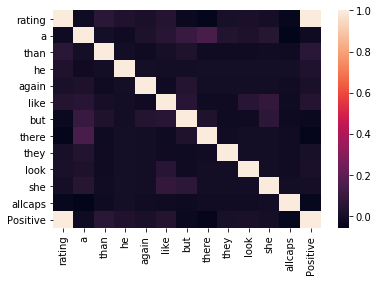

In [11]:
sns.heatmap(amazon2.corr())

In [12]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

y_pred2 = bnb.fit(data2, target2).predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))
print((data2.shape[0] - (target2 != y_pred2).sum())/data2.shape[0])

Number of mislabeled points out of a total 1000 points : 516
0.516


In [13]:
bnb = MultinomialNB()

y_pred2 = bnb.fit(data2, target2).predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))
print((data2.shape[0] - (target2 != y_pred2).sum())/data2.shape[0])

Number of mislabeled points out of a total 1000 points : 521
0.521


In [14]:
bnb = BernoulliNB()

y_pred2 = bnb.fit(data2, target2).predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 == y_pred2).sum()
))
print((data2.shape[0] - (target2 != y_pred2).sum())/data2.shape[0])

Number of mislabeled points out of a total 1000 points : 527
0.527


## Classify Version 2
## Instead of looking for Good rating, we are looking for Bad rating instead.
## The answer we suppose to see is the Opposite of Good rating, to see both Good and Bad rating to equal to 100%.

In [15]:
data_path3 = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/amazon_cells_labelled.txt"
            )
amazon3 = pd.read_csv(data_path3, delimiter= '\t', header=None)
amazon3.columns = ['message', 'rating']
keywords = ['a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she']
print(amazon3.head())

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon3[str(key)] = amazon3.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
amazon3.head()

                                             message  rating
0  So there is no way for me to plug it in here i...       0
1                        Good case, Excellent value.       1
2                             Great for the jawbone.       1
3  Tied to charger for conversations lasting more...       0
4                                  The mic is great.       1


,message,rating,a,than,he,again,like,but,there,they,look,she
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False


In [16]:
amazon3['allcaps'] = amazon3.message.str.isupper()
amazon3['Negative'] = (amazon3['rating'] == 0)
data3 = amazon3[keywords + ['allcaps']]
target3 = amazon3['Negative']

amazon3.head()

,message,rating,a,than,he,again,like,but,there,they,look,she,allcaps,Negative
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False,False,True
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False,False,True
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,False


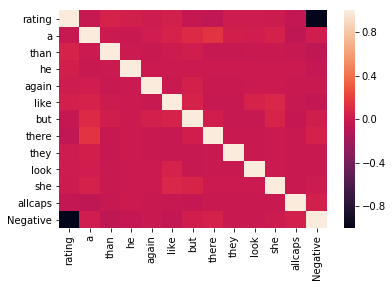

In [34]:
sns.heatmap(amazon3.corr())

In [18]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

y_pred3 = bnb.fit(data3, target3).predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
print((data3.shape[0] - (target3 == y_pred3).sum())/data3.shape[0])

Number of mislabeled points out of a total 1000 points : 484
0.484


In [19]:
bnb = MultinomialNB()

y_pred3 = bnb.fit(data3, target3).predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
print((data3.shape[0] - (target3 == y_pred3).sum())/data3.shape[0])

Number of mislabeled points out of a total 1000 points : 473
0.473


In [20]:
bnb = BernoulliNB()

y_pred3 = bnb.fit(data3, target3).predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != y_pred3).sum()
))
print((data3.shape[0] - (target3 == y_pred3).sum())/data3.shape[0])

Number of mislabeled points out of a total 1000 points : 473
0.473


## Classify Version 3
## I will make it all Upper case to see what changes.


In [21]:
data_pathhhh = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/amazon_cells_labelled.txt"
            )
amazon4 = pd.read_csv(data_pathhhh, delimiter= '\t', header=None)
amazon4.columns = ['message', 'rating']
keywords = ['a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she']

amazon4['All_Caps'] = " " + amazon4.message.str.upper() + " "

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon4[str(key)] = amazon4.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
amazon4.head()

,message,rating,All_Caps,a,than,he,again,like,but,there,they,look,she
0,So there is no way for me to plug it in here i...,0,SO THERE IS NO WAY FOR ME TO PLUG IT IN HERE ...,True,False,False,False,False,False,True,False,False,False
1,"Good case, Excellent value.",1,"GOOD CASE, EXCELLENT VALUE.",False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,GREAT FOR THE JAWBONE.,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,TIED TO CHARGER FOR CONVERSATIONS LASTING MOR...,False,True,False,False,False,False,False,False,False,False
4,The mic is great.,1,THE MIC IS GREAT.,False,False,False,False,False,False,False,False,False,False


In [22]:
amazon4['allcaps'] = amazon4.message.str.isupper()
amazon4['Positive'] = (amazon4['rating'] == 1)
data4 = amazon4[keywords + ['allcaps']]
target4 = amazon4['Positive']
amazon4.head()

,message,rating,All_Caps,a,than,he,again,like,but,there,they,look,she,allcaps,Positive
0,So there is no way for me to plug it in here i...,0,SO THERE IS NO WAY FOR ME TO PLUG IT IN HERE ...,True,False,False,False,False,False,True,False,False,False,False,False
1,"Good case, Excellent value.",1,"GOOD CASE, EXCELLENT VALUE.",False,False,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,1,GREAT FOR THE JAWBONE.,False,False,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,0,TIED TO CHARGER FOR CONVERSATIONS LASTING MOR...,False,True,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,THE MIC IS GREAT.,False,False,False,False,False,False,False,False,False,False,False,True


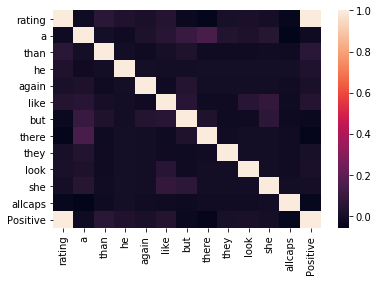

In [33]:
sns.heatmap(amazon4.corr())

In [24]:
data4 = amazon4[keywords + ['allcaps']]
target4 = amazon4['Positive']

In [25]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
print('success rate = %s' % ((data4.shape[0] - (target4 == y_pred4).sum())/data4.shape[0]))

Number of mislabeled points out of a total 1000 points : 484
success rate = 0.484


In [26]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
print('success rate = %s' % ((data4.shape[0] - (target4 == y_pred4).sum())/data4.shape[0]))

Number of mislabeled points out of a total 1000 points : 473
success rate = 0.473


In [27]:
bnb = MultinomialNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
print('success rate = %s' % ((data4.shape[0] - (target4 == y_pred4).sum())/data4.shape[0]))

Number of mislabeled points out of a total 1000 points : 479
success rate = 0.479


## Lastly I want to remove any reviews that have less than 5 words. Those reviews are too short and does not give us any insight if the company/restaurant is doing bad or good.

In [28]:
data_pathhhhh = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/amazon_cells_labelled.txt"
            )
amazon5 = pd.read_csv(data_pathhhhh, delimiter= '\t', header=None)
amazon5.columns = ['message', 'rating']
keywords = ['a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she']


for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon5[str(key)] = amazon5.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
amazon5.head()

,message,rating,a,than,he,again,like,but,there,they,look,she
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False


In [29]:
amazon5['message_words'] = amazon5['message'].apply(lambda x: len(x.split(' ')))
amazon5.head()

,message,rating,a,than,he,again,like,but,there,they,look,she,message_words
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False,21
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False,4
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,4
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False,11
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,4


In [30]:
amazon5 = amazon5[amazon5['message_words'] >= 5]

In [31]:
amazon5.head()

,message,rating,a,than,he,again,like,but,there,they,look,she,message_words
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False,21
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False,11
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,False,False,17
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,False,False,21
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False,8


In [36]:
amazon5['allcaps'] = amazon5.message.str.isupper()
amazon5['Positive'] = (amazon5['rating'] == 1)
data5 = amazon5[keywords + ['allcaps']]
target5 = amazon5['Positive']
amazon5.head()

,message,rating,a,than,he,again,like,but,there,they,look,she,message_words,allcaps,Positive
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False,21,False,False
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False,11,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,False,False,17,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,False,False,21,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False,8,False,True


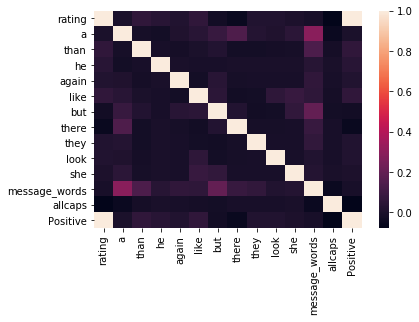

In [37]:
sns.heatmap(amazon5.corr())

In [38]:
data5 = amazon5[keywords + ['allcaps']]
target5 = amazon5['Positive']

In [39]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data4, target4)

# Classify, storing the result in a new variable.
y_pred4 = bnb.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != y_pred4).sum()
))
print('success rate = %s' % ((data4.shape[0] - (target4 == y_pred4).sum())/data4.shape[0]))

Number of mislabeled points out of a total 1000 points : 484
success rate = 0.484


In [40]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data5, target5)

# Classify, storing the result in a new variable.
y_pred5 = bnb.predict(data5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != y_pred5).sum()
))
print('success rate = %s' % ((data5.shape[0] - (target5 == y_pred5).sum())/data5.shape[0]))

Number of mislabeled points out of a total 756 points : 345
success rate = 0.45634920634920634


In [41]:
bnb = MultinomialNB()

# Fit our model to the data.
bnb.fit(data5, target5)

# Classify, storing the result in a new variable.
y_pred5 = bnb.predict(data5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != y_pred5).sum()
))
print('success rate = %s' % ((data5.shape[0] - (target5 == y_pred5).sum())/data5.shape[0]))

Number of mislabeled points out of a total 756 points : 345
success rate = 0.45634920634920634


In [ ]:
""" 
For this Challenge, my classifiers does not overfit because all the keywords are independent to each other.
Overall, GaussianNB performed the best as it come out top 4 out of 5 times. Second best method to use is MultinomialNB, 
which always come out on top of Bernoulli or tie with it. One reason why GaussianNB works the best is because the 
dataset have Categorical inputs, and GaussianNB work best with Categorical. 

When we reduce the word to lowercase, our keywords appeared more often, thus, result in a better cleaning. Instead of
almost reaching 500 words that are mislabeled, using the lowercase have make the outcome of mislabeled to pass 500 words 
that are mislabeled. In conclusion, I believe people ex
"""